In [17]:
#####################################################
##    Mecanismos de Came - Diagramas de Elevação   ##
##    Código desenvolvido por José Maria Bezerra   ##
##    para a disciplina Mecanismos - UFPE/DEMEC.   ##
#####################################################

from sympy import *
from IPython import get_ipython
import matplotlib.pyplot as pl
get_ipython().run_line_magic('matplotlib', 'inline')

θ = symbols('theta')
x = symbols('x')

def GetElev(curva, h, β, revert = 0):
    if (curva == 'harmonica'):
        u = 0.5*h*( 1 - cos(pi*θ/β) )
    elif (curva == 'cicloide'):
        u = h*( θ/β - (1/(2*pi))*sin(2*pi*θ/β) )
    elif (curva == 'duplaharmonica'):
        u = 0.5*h*( 1 - cos(pi*θ/β) - 0.25*(1 - cos(2*pi*θ/β)) )
    elif (curva == 'duplacicloide'):
        u = 4*h/3*( θ/β - 0.5*(1/pi)*sin(2*pi*θ/β) - 0.25*(θ/β - 0.25*(1/pi)*sin(4*pi*θ/β)) )
    elif (curva[0] in ['3','4']):
        curva = curva.replace('-',"")
        k = [int(i) for i in curva]
        if (len(k) == 2):
            a,b = k[0],k[1]
            u = h*(b*(θ/β)**a - a*(θ/β)**b)
        elif (len(k) == 3):
            a,b,c = k[0],k[1],k[2]
            u = 0.5*h*(b*c*(θ/β)**a - 2*a*c*(θ/β)**b + a*b*(θ/β)**c)
        elif (len(k) == 4):
            a,b,c,d = k[0],k[1],k[2],k[3]
            u = 0.5*h*( (1/3)*b*c*d*(θ/β)**a - a*c*d*(θ/β)**b + a*b*d*(θ/β)**c - (1/3)*a*b*c*(θ/β)**d )
    else:
        print('ERRO --> função inexistente')
        return 0

    if (revert == 1):
        u = u.subs(θ,β-θ)

    return u, β

def GetRet(curva, h, β):
    return GetElev(curva, h, β, 1)

def PlotCurv(C, acel = 0):
    u = C[0]; β = C[1]
    if (acel == 0):
        p = plot(u, diff(u,θ), diff(u,θ,2), diff(u,θ,3), (θ,0,β), show = False)
        p[3].line_color = 'y'
    else:
        p = plot(u, diff(u,θ), diff(u,θ,2), (θ,0,β), show = False)
    p[1].line_color = 'g'
    p[2].line_color = 'r'
    p.show()

def PlotDiagrams(E, βs, R, βi):
    f = E[0]; β1 = E[1]; g = R[0]; β2 = R[1]
    p = plot(f, diff(f,θ), diff(f,θ,2), diff(f,θ,3), (θ,0,β1), show = False)
    p[1].line_color = 'g'
    p[2].line_color = 'r'
    p[3].line_color = 'y'

    g = g.subs(θ,θ-β1)
    if (βs != 0):
        v = Lambda(θ,f)
        g = g.subs(θ,θ-βs)
        s = plot(v(β1), 0, (θ,β1,β1+βs), show = False)
        s[1].line_color = 'y'
        p.extend(s)

    q = plot(g, diff(g,θ), diff(g,θ,2), diff(g,θ,3), (θ,β1+βs,β1+βs+β2), show = False)
    q[1].line_color = 'g'
    q[2].line_color = 'r'
    q[3].line_color = 'y'

    if (βi != 0):
        t = plot(0, (θ,β1+βs+β2,β1+βs+β2+βi), show = False)
        t[0].line_color = 'y'
        p.extend(t)

    p.extend(q)
    p.show()

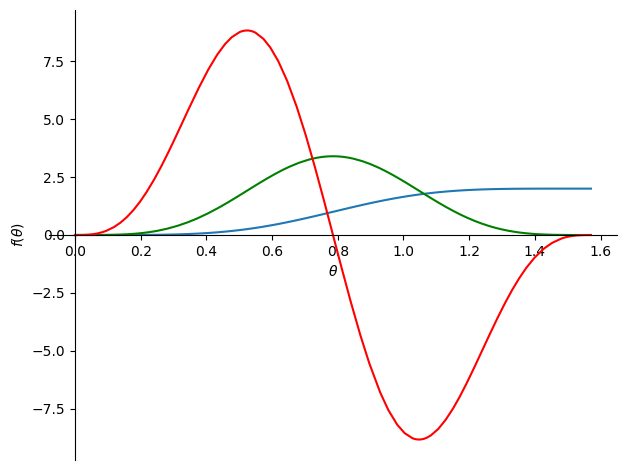

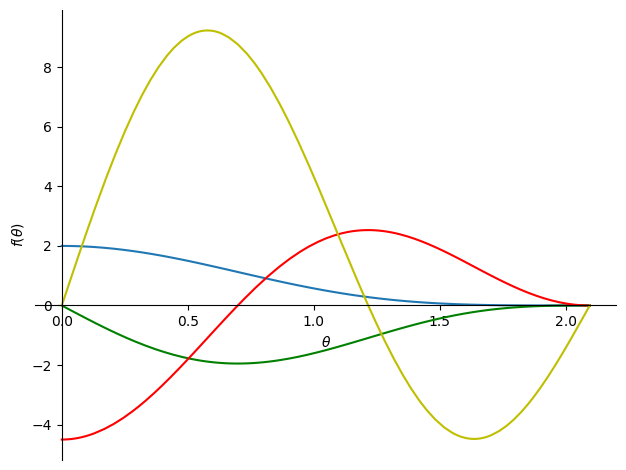

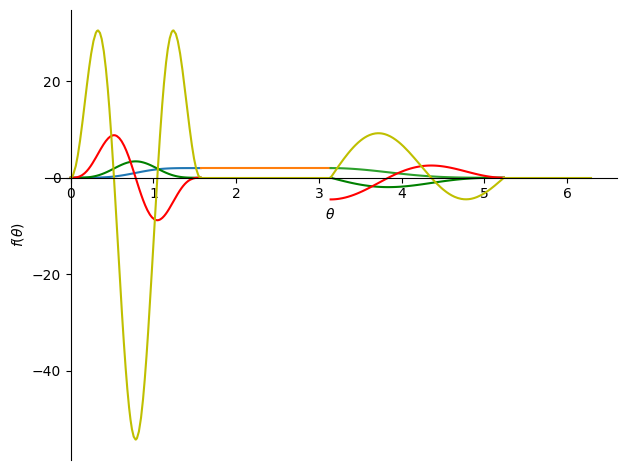

In [18]:
f = GetElev('duplacicloide', 2, pi/2)
g = GetRet('duplaharmonica', 2, 2*pi/3)
PlotCurv(f,1)
PlotCurv(g)
PlotDiagrams(f, pi/2, g, pi/3)